### Laboratorio 6 - Sistema de Recomendación (Basado En Filtro Colaborativo)
Stefano Aragoni, Carol Arévalo

-----------

En esta práctica se diseñó una red neuronal para la predicción de ratings de películas, basado en el filtro colaborativo. Dicha red recibe el ID de un usuario y el ISBN de una película, y el grupo de usuario al que pertenece, y devuelve un rating estimado para dicha película.

A continuación se muestra el código utilizado para la creación de la Red Neuronal, así como los resultados obtenidos.

------- 

##### *Importar librerías*

Como primer paso, se importaron las librerías necesarias para el desarrollo del laboratorio.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from keras import regularizers
from keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from keras.layers import Activation
from keras.callbacks import EarlyStopping

##### *Cargar datos*

Posteriormente, se cargaron los datos del archivo ./archive/final_ratings.csv. Este ya fue analizado y procesado en el análisis exploratorio de datos, por lo que no se realizaron modificaciones adicionales.

In [83]:
# Cargamos los datos
df = pd.read_csv('./archive/final_ratings.csv')

df.head()

,User-ID,Location,Age,ISBN,Book-Author,Year-Of-Publication,Publisher,Book-Rating,Continent,User-Group
0,248805,111,34.0,425118703.0,21432,1995.0,1714,9,3,17
1,167614,111,46.0,345337662.0,5191,1993.0,1388,6,3,26
2,140036,111,35.0,688149553.0,81432,1997.0,11425,9,3,31
3,50446,111,18.0,679734775.0,86489,1991.0,15646,5,3,46
4,265889,18,30.0,743444477.0,12279,2003.0,11710,9,3,36


##### *Conjunto de Entrenamiento y Validación*

Se separó el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación, con el fin de poder evaluar el desempeño de la red neuronal.

In [84]:
scaler = MinMaxScaler()
X = df[['User-ID', 'User-Group', 'ISBN', "Book-Author"]].values
X = scaler.fit_transform(X)

y = df[['Book-Rating']].values
y = scaler.fit_transform(y)

# Dividimos los datos en entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(213216, 4) (213216, 1) (91379, 4) (91379, 1)


##### *Diseño de Red Neuronal*

Posteriormente, se diseñó la red neuronal. Esta recibe como entrada el ID de un usuario, el ISBN de una película, y el grupo de usuario al que pertenece, y devuelve un rating estimado para dicha película.

Esta red permite un Sistema de Recomendación basado en Filtro Colaborativo, ya que permite predecir el rating que un usuario le daría a una película, basado en los ratings que otros usuarios le han dado a dicha película y sus similitudes con el usuario en cuestión.

In [85]:
model2 = Sequential()

model2.add(Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(16, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='mean_squared_error')

In [86]:
# Ya que se utilizó Dropout 0.3, se debe utilizar solo el 0.7 de los datos de entrenamiento
X_train2, _, y_train2, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Enrtenamiento del modelo
history2 = model2.fit(X_train2, y_train2, epochs=10, batch_size=512, validation_data=(X_test, y_test), callbacks=[early_stopping])

loss1 = model2.evaluate(X_test, y_test)
print(f"\nTest loss (Model 1): {loss1}")

Epoch 1/10
292/292 [==============================] - 4s 8ms/step - loss: 0.7576 - val_loss: 0.1316
Epoch 2/10
292/292 [==============================] - 2s 8ms/step - loss: 0.1123 - val_loss: 0.1059
Epoch 3/10
292/292 [==============================] - 2s 7ms/step - loss: 0.1059 - val_loss: 0.1054
Epoch 4/10
292/292 [==============================] - 2s 7ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 5/10
292/292 [==============================] - 2s 8ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 6/10
292/292 [==============================] - 2s 7ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 7/10
292/292 [==============================] - 2s 8ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 8/10
292/292 [==============================] - 2s 8ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 9/10
292/292 [==============================] - 2s 8ms/step - loss: 0.1058 - val_loss: 0.1054
Epoch 10/10
2856/2856 [==============================] - 5s 2ms/step - loss: 0.1054

Test loss (Mode

En este caso, se tiene un MSE de 0.1053. Ya que los valores fueron escalados del 0 a 1, esto significa que el error promedio es 10.53%. Esto es un error relativamente bajo, por lo que se puede decir que la red neuronal tiene un buen desempeño.

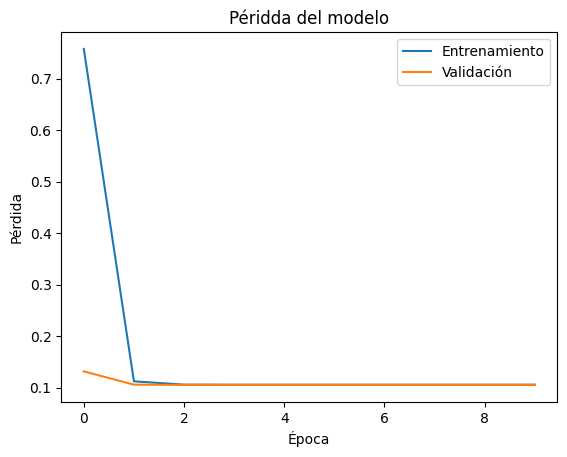

In [90]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

plt.show()